# Analysis of Signature Schemes based on Group Actions
In line with Section 7 we overview the parameters of the three candidates of the additional call for signatures by NIST based on
group actions, namely LESS, MEDS, and ALTEQ.  
We use the module `grass.py` (referencing also to other module like `generageneral_purpose.py`) to study several combinations of parameter choices.  

Our main tool is the class `GRASS` (GRoup Action Signature Scheme) that takes as input a Cryptographic Group Action and the settings for instantiate a signature with it, namely:
* the security level `lam`;
* the number of public keys;
* if the Fixed Weight optimization is used (and eventually the parameter $w$);
* if the MPCitH optimization is used (and eventually the parameter $N$);
* if the Skipping Edges optimization is used (left or right).

Then:
* it evaluates the minimum number of rounds such that the action reach the $\lambda$-bits security level;
* how many group actions are required to perform a signature;
* if the group action is defined it instatiates a signature with the required specs.

We then use the method `GRASS.size(set_cost, group_cost)` to estimate the signature and public key size for the values in input. We see in the next cell an example for a signatue using a combination of *Skipping Edges* and *Multiple Keys* ($s = 2$) without *Fixed Weight*, with $l_X = 1000 B$ and $l_G = 100 B$.

In [39]:
load('grass.py')
# Example
sig = GRASS(action = None, # action can be empty (will not output signatures)
            fixed_weight=False, num_public_keys = 2, MPC = True, N = 10, skip=True)

sig.size(set_cost = 1000, group_cost=100)

{'pub_key': 2016,
 'signature': 6280,
 'group_actions': 180,
 'ver_group_actions': 300}

In [6]:
print(f'The action requires t = {sig.group_actions_signing} group action evaluation and send, on average, {sig.w} full group elements')

The action requires t = 300 group action evaluation and send, on average, 29 full group elements


## Approximate comparisons
In this section we compare different constructions only considering the number of group action evaluation (in signing and verifying) with the average number of full group elements sent in the signature. 

### Fixed Weight and MPCitH
We compare now three constructions: Fixed Weight, MPCitH and the two combined.

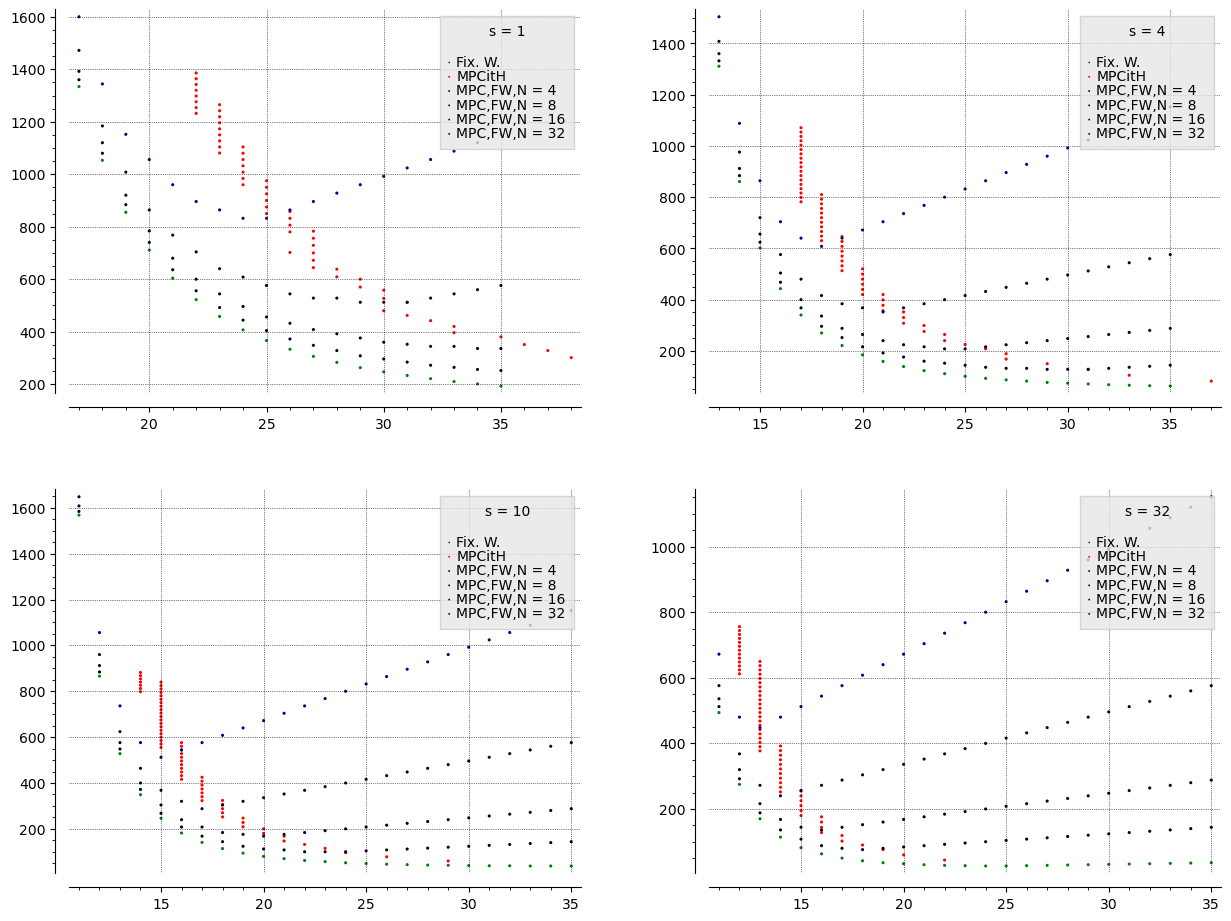

In [46]:
l = []
i = 0
for num_public_keys in [1,4,10,32]:
    # fixed weight
    data_fw = []
    for w in range(35,10,-1):
        sig = GRASS(action = None, fixed_weight=True, w = w, num_public_keys = num_public_keys, MPC = False)
        if sig.group_actions_signing < 1700:
            data_fw.append((sig.w,sig.group_actions_signing))
    
    G = list_plot(data_fw, faceted = False, rgbcolor = 'green', size = 5, legend_label='Fix. W.', gridlines=True)
    
    # MPC
    data_mpc = []
    for N in range(2,64):
        sig = GRASS(action = None, fixed_weight=False, num_public_keys = num_public_keys, MPC = True, N = N, skip = True)
        if sig.w < 40 and sig.group_actions_signing < 1700: 
            data_mpc.append((sig.w,sig.group_actions_signing))
    
    G += list_plot(data_mpc, faceted = False, rgbcolor = '#ff0000', size = 5, legend_label='MPCitH')
    
    
    # MPC + FW
    for n in range(2,5+1):
        N = 2**n
        data_mpc_fw = []
        for w in range(35,10,-1):
            sig = GRASS(action = None, fixed_weight=True, w = w, num_public_keys = num_public_keys, MPC = True, N = N, skip = True)
            if sig.group_actions_signing < 1700:
                data_mpc_fw.append((sig.w,sig.group_actions_signing))
    
        G += list_plot(data_mpc_fw, faceted = False, rgbcolor = '#' + (N * 4).hex().rjust(6,'0'), size = 5, legend_label=f'MPC,FW,{N = }')
    
    G.legend(True)
    G.set_legend_options(back_color=(0.9,0.9,0.9), shadow=False, title = f's = {num_public_keys}\n', loc = 'upper right')
    

    posx = (i) % 2
    posy = (i) // 2
    i += 1
    l.append((G,(posx,-posy,0.8,0.8)))

OUT = multi_graphics(l)
OUT

It is clear from the graphs that for all the considered cases *Fixed Weight* alone (green) is superior to *MPCitH*, confirming the observation from Section 6.  
Now we proceed in comparing *Fixed Weight* with the combination from Section 5.3 of *Skipping Edges* and *Fixed Weight*, taking into consideration the group action evaluations during the verification.

In [ ]:
l = []
i = 0
for num_public_keys in [1,4,10,32]:
    # fixed weight
    data_fw = []
    for w in range(35,8,-1):
        sig = GRASS(action = None, fixed_weight=True, w = w, num_public_keys = num_public_keys, MPC = False)
        if sig.group_actions_signing < 1700:
            data_fw.append((sig.w,sig.group_actions_signing))
    
    G = list_plot(data_fw, rgbcolor = 'green',  plotjoined=True,  legend_label='Fix. W.', gridlines=True)
    
    # MPC + FW
    for n in range(2,5+1):
        N = 2**n
        data_mpc_fw = []
        for w in range(35,8,-1):
            sig = GRASS(action = None, fixed_weight=True, w = w, num_public_keys = num_public_keys, MPC = True, N = N, skip = True)
            if sig.group_actions_signing < 1700:
                data_mpc_fw.append((sig.w,sig.group_actions_verify))
    
        G += list_plot(data_mpc_fw, rgbcolor = '#b0' + (N * 8).hex().rjust(4,'0'), plotjoined=True, legend_label=f'MPC,FW,{N = }')
    
    G.legend(True)
    G.set_legend_options(back_color=(0.9,0.9,0.9), shadow=False, title = f's = {num_public_keys}\n', loc = 'upper right')
    

    posx = (i) % 2
    posy = (i) // 2
    i += 1
    l.append((G,(posx,-posy,0.8,0.8)))

OUT = multi_graphics(l)
OUT

# Bibliography

In [1]:
pip install docutils==0.17.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 2.4 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.
